In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score


In [7]:
# Load dataset
df = pd.read_csv("penguins_size.csv")
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

#### Dataset Columns
##### species: 
Penguin species (Adelie, Chinstrap, Gentoo).


##### island: 
Sampling location (Torgersen, Biscoe, Dream).

##### culmen_length_mm: 
Length of culmen (upper beak) in millimeters.

##### culmen_depth_mm: 
Depth of culmen (upper beak) in millimeters.

##### flipper_length_mm: 
Flipper length in millimeters.

##### body_mass_g: 
Body mass in grams.

##### sex: 
Biological sex (MALE, FEMALE, or NA for missing/unknown)

#### Drop rows with all NA values

In [9]:
df = df.dropna(how="all")
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

In [78]:
df.describe(include='all')  # Statistical summary


species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
count      342     342        342.000000       342.000000         342.000000   
unique       3       3               NaN              NaN                NaN   
top     Adelie  Biscoe               NaN              NaN                NaN   
freq       151     167               NaN              NaN                NaN   
mean       NaN     NaN         43.921930        17.151170         200.915205   
std        NaN     NaN          5.459584         1.974793          14.061714   
min        NaN     NaN         32.100000        13.100000         172.000000   
25%        NaN     NaN         39.225000        15.600000         190.000000   
50%        NaN     NaN         44.450000        17.300000         197.000000   
75%        NaN     NaN         48.500000        18.700000         213.000000   
max        NaN     NaN         59.600000        21.500000         231.000000   

        body_mass_g   sex  culmen_ratio  
count    342.000000   342    342.000000  
unique          NaN     4           NaN  
top             NaN  MALE           NaN  
freq            NaN   168           NaN  
mean    4201.754386   NaN      2.605649  
std      801.954536   NaN      0.497375  
min     2700.000000   NaN      1.639810  
25%     3550.000000   NaN      2.160344  
50%     4050.000000   NaN      2.575067  
75%     4750.000000   NaN      3.098777  
max     6300.000000   NaN      3.612676

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
 7   culmen_ratio       342 non-null    float64
dtypes: float64(5), object(3)
memory usage: 24.0+ KB


In [22]:
df = df.dropna(subset=['body_mass_g'])      # Drop rows where target (body_mass_g) is missing
df                                        

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[342 rows x 7 columns]

In [69]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
culmen_ratio         0
dtype: int64

##### Handle missing values - drop rows with all measurement NaNs

In [70]:
df_clean = df.dropna(subset=['culmen_length_mm', 'culmen_depth_mm',
                             'flipper_length_mm', 'body_mass_g'])
df_clean['sex'] = df_clean['sex'].replace('.', np.nan)
df_clean

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  culmen_ratio  
0         3750.0    MALE      2.090909  
1         3800.0  FEMALE      2.270115  
2         3250.0  FEMALE      2.238889  
4         3450.0  FEMALE      1.901554  
5         3650.0    MALE      1.907767  
..           ...     ...           ...  
338       4925.0  FEMALE      3.445255  
340       4850.0  FEMALE      3.272727  
341       5750.0    MALE      3.210191  
342       5200.0  FEMALE      3.054054  
343       5400.0    MALE      3.099379  

[342 rows x 8 columns]

In [72]:
df_clean.shape

(342, 8)

In [73]:
df_clean.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  1
culmen_ratio         0
dtype: int64

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                341 non-null    object 
 7   culmen_ratio       342 non-null    float64
dtypes: float64(5), object(3)
memory usage: 24.0+ KB


#### Problem Statement:
##### This dataset can help answer questions like:
* How do physical attributes (culmen length, depth, flipper length, body mass) vary across species?
* Are there differences between male and female penguins?
* Can we predict species or sex based on physical measurements?

#### Identify Data Types:
* Discrete:
  species, island, sex
** Continuous: 
culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g
* Ordinal: None (no ranking order here)

* Relationships:
* species ↔ measurements, sex ↔ measurements, island ↔ species distribution

In [32]:
df['sex'] = df['sex'].fillna('unknown')
df[['sex']].head()

sex
0    MALE
1  FEMALE
2  FEMALE
4  FEMALE
5    MALE

In [76]:
# Convert data types
df_clean["sex"] = df_clean["sex"].astype("category")
df_clean["species"] = df_clean["species"].astype("category")
df_clean["island"] = df_clean["island"].astype("category")

#### EDA

array([[<Axes: title={'center': 'culmen_length_mm'}>,
        <Axes: title={'center': 'culmen_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

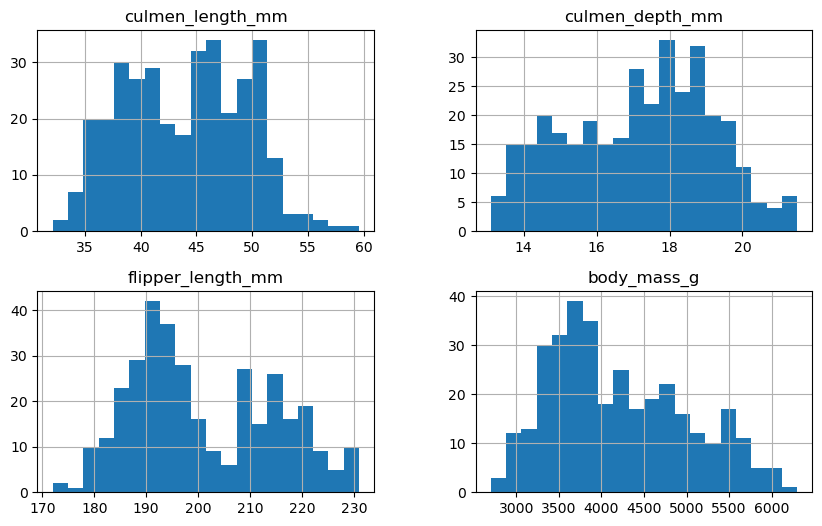

In [80]:
# Histograms
df_clean[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].hist(bins=20,figsize=(10,6))

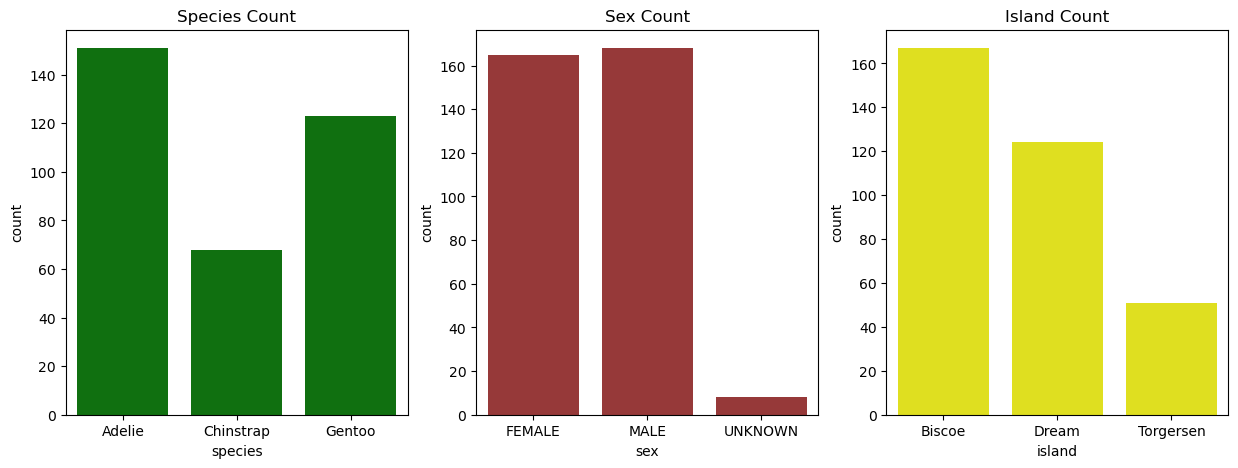

In [92]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Species count plot
sns.countplot(x='species', data=df_clean, color='green', ax=axes[0])
axes[0].set_title("Species Count")

# Sex count plot
sns.countplot(x='sex', data=df_clean, color='brown', ax=axes[1])
axes[1].set_title("Sex Count")

# Island count plot
sns.countplot(x='island', data=df_clean, color='yellow', ax=axes[2])
axes[2].set_title("Island Count")

# Adjust layout

plt.show()

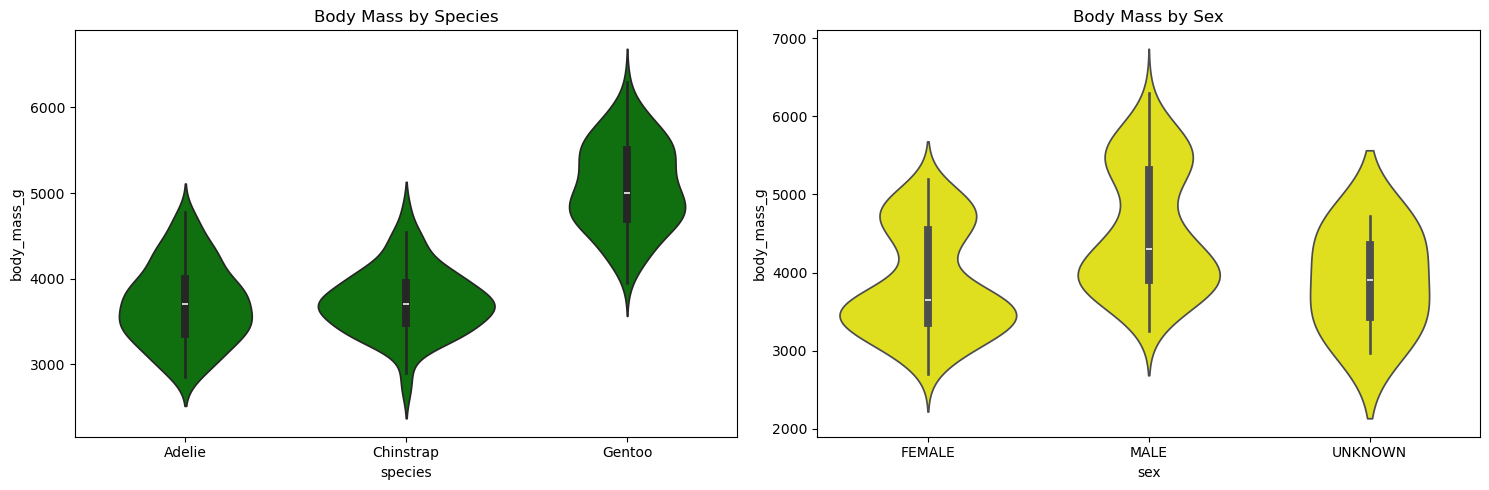

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Violin plot by species
sns.violinplot(x="species", y="body_mass_g", data=df_clean, color='green', ax=axes[0])
axes[0].set_title("Body Mass by Species")

# Violin plot by sex
sns.violinplot(x="sex", y="body_mass_g", data=df_clean, color='yellow', ax=axes[1])
axes[1].set_title("Body Mass by Sex")

# Adjust layout and show
plt.tight_layout()
plt.show()

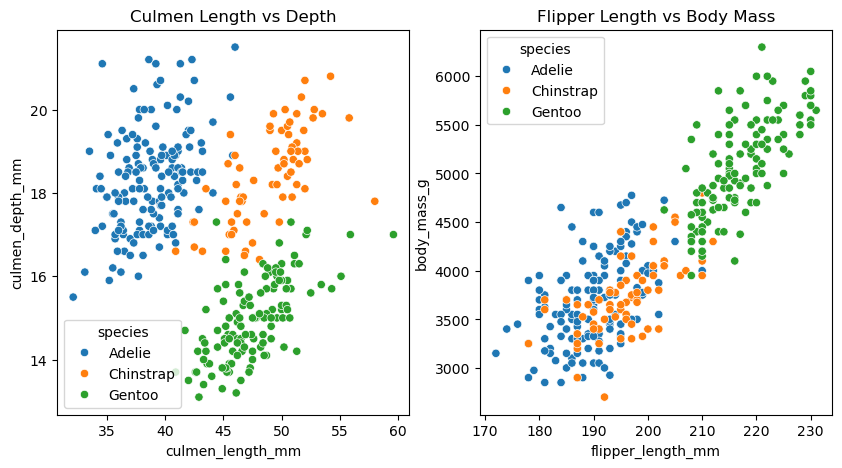

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Culmen Length vs Depth
sns.scatterplot(
    x='culmen_length_mm',
    y='culmen_depth_mm',
    hue='species',
    data=df_clean,
    ax=axes[0]
)
axes[0].set_title("Culmen Length vs Depth")

# flipper length vs body mass
sns.scatterplot(
    x='flipper_length_mm',
    y='body_mass_g',
    hue='species',
    data=df_clean,
    ax=axes[1]
)
axes[1].set_title("Flipper Length vs Body Mass")


plt.show()

#### Feature Engineering

In [31]:
df['culmen_ratio'] = df['culmen_length_mm'] / df['culmen_depth_mm']
df[['culmen_ratio']].head()

culmen_ratio
0      2.090909
1      2.270115
2      2.238889
4      1.901554
5      1.907767

#### Define features and target

In [33]:
X = df.drop(columns=['body_mass_g'])
y = df['body_mass_g']

In [35]:
X.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

      sex  culmen_ratio  
0    MALE      2.090909  
1  FEMALE      2.270115  
2  FEMALE      2.238889  
4  FEMALE      1.901554  
5    MALE      1.907767

In [34]:
y.head()

0    3750.0
1    3800.0
2    3250.0
4    3450.0
5    3650.0
Name: body_mass_g, dtype: float64

#### Train, test and split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    rabdom_state = 42
                                                   )

#### Preprocessing

In [36]:
categorical_features = ['species','island','sex']
numeric_features = ['culmen_length_mm','cumlen_depth_mm',
                     'flipper_length_mm','culmen_ratio' ]

In [39]:
numeric_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy = 'mean')),
                                      ('scaler',StandardScaler())   ])

In [40]:
categorical_transformer = Pipeline(steps = [('imputer',SimpleImputer(strategy = 'most_frequent')),
                                            ('onehot',OneHotEncoder(handle_unknown = 'ignore')) ] 
                                   )

In [57]:
preprocessor = ColumnTransformer(
    transformers = [
                ('num',numeric_transformer, numeric_features),
                ('cat',categorical_transformer, categorical_features)
                ]
                  )

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [51]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [55]:
X_train_preprocessed.shape 

(273, 14)

In [56]:
X_test_preprocessed.shape

(69, 14)

#### Model development

In [65]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42, n_estimators=100),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

results = []

for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({"Model": name, "R2 Score": r2, "MAE": mae, "RMSE": rmse})
    print(f"{name} trained successfully. R2={r2}, MAE={mae}, RMSE={rmse}")

results_df = pd.DataFrame(results)
print("\n Model Performance Comparison:")
results_df

LinearRegression trained successfully. R2=0.8754358412154962, MAE=233.69377566069323, RMSE=287.7932623401377
DecisionTree trained successfully. R2=0.6841852448529935, MAE=366.30434782608694, RMSE=458.24768633238676
RandomForest trained successfully. R2=0.8149692693501386, MAE=276.5, RMSE=350.7567233646523
KNN trained successfully. R2=0.8291725935227084, MAE=263.04347826086956, RMSE=337.02556562382324

 Model Performance Comparison:


Model  R2 Score         MAE        RMSE
0  LinearRegression  0.875436  233.693776  287.793262
1      DecisionTree  0.684185  366.304348  458.247686
2      RandomForest  0.814969  276.500000  350.756723
3               KNN  0.829173  263.043478  337.025566

#### Conclusion
- Random Forest emerged as the best-performing model for predicting penguin body mass.
- It achieved the highest R² score (explained variance) and the lowest MAE/RMSE, showing strong accuracy and robustness.
- This makes it the most reliable choice for deployment.
- Linear Regression provided a good baseline.
- It’s simple and interpretable, but it underfits the penguin dataset because body mass depends on nonlinear interactions (species, island, sex, flipper length).
- Decision Tree captured nonlinear patterns but was less stable.
- It can overfit easily, so while useful for visualization and rule-based insights, it’s not as strong as Random Forest.
- KNN showed weaker performance compared to Random Forest.
- It’s sensitive to scaling and parameter choice, and computationally heavier for larger datasets.

